## Importing required packages

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import statsmodels.api as sm
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,7


C:\Users\Saranga\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


In [2]:
warnings.filterwarnings("ignore")

## Loading dataset

In [4]:
df = pd.read_csv('monthly_data2.csv',parse_dates=['Date'], index_col='Date')

In [3]:
df.shape

(240, 1)

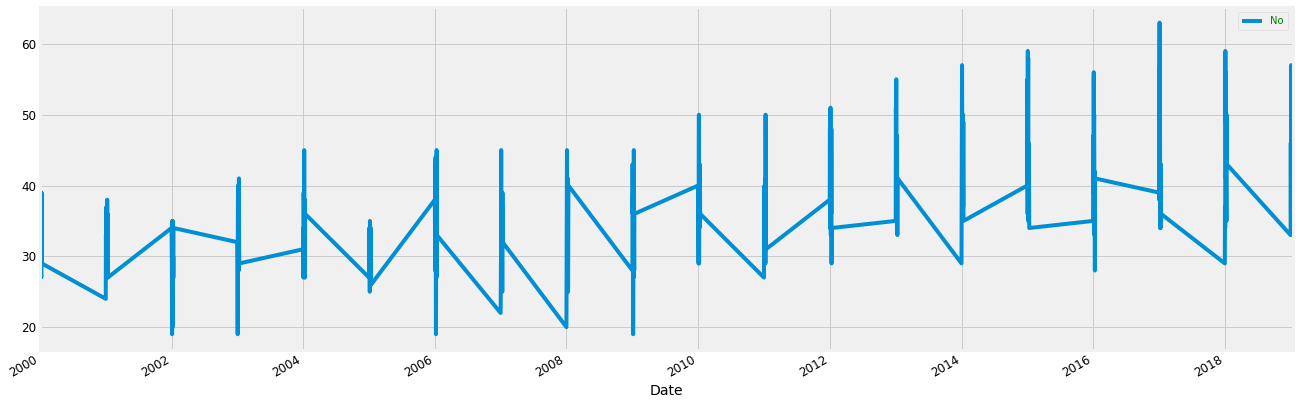

In [4]:
df.plot(figsize=(20, 7))
plt.show()

## Dataset decomposed into its components- Trend, Seasonality, Residue

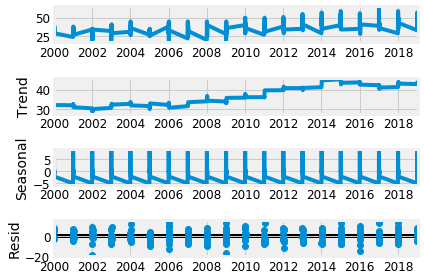

In [5]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive',freq=12)
fig = decomposition.plot()
plt.show()

## Seasonal component present, so SARIMA model used

In [7]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [8]:

mod = sm.tsa.statespace.SARIMAX(df,order=pdq[0],seasonal_order=seasonal_pdq[0],enforce_stationarity=False,enforce_invertibility=False)
results=mod.fit()
min_aic=results.aic
print(min_aic)


2413.714530913616


### For loop choosing optimal hyperparameters (p,d,q),(P,D,Q) by finding minimum AIC score

In [9]:

mod = sm.tsa.statespace.SARIMAX(df,order=pdq[0],seasonal_order=seasonal_pdq[0],enforce_stationarity=False,enforce_invertibility=False)
results=mod.fit()
min_aic=results.aic

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            if results.aic<min_aic:
                min_aic=results.aic
                min_param=param
                min_seasonal_param=param_seasonal
                
                            
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2413.714530913616
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2094.9247583897777
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1835.7136067378067
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1610.2061613675876
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1457.2919532642195
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1377.953064234487
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1763.2570220021826
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1479.1904213478697
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:1321.630330081065
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1618.1104921452943
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1517.7831517318693
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1445.6576121668095
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1486.5114685553788
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1460.8953334487824
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:1377.7478697401857
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1554.8752637268599
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1440.9998119474155
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:1323.627777876

ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1484.5524339729154
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1420.0477391726613
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1344.3992246472353
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:1555.5232627905525
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:1424.403568017376
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:1309.0244389483755
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1449.9977953475548
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:1449.8480056727149
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1427.8384601204043
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1384.5949034706007
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1364.8336497800333
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:1345.8748231328493
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:1429.691895440185
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:1349.9133444905124
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:1311.0247629289727
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:2039.5658877655255
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1934.0024049557692
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:1827.47145014

ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:1422.576829956638
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:1341.8337659043536
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:1323.4774003445573
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:1606.6682641620282
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1525.862232620972
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1438.3640041009467
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1601.6133423116303
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:1430.8290683166802
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:1368.8464898472553
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:1753.0474086690988
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:1468.5785907207403
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:1310.7101147095302
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:1526.4413257488445
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1510.280142258663
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:1438.1236593443732
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:1481.8407440449273
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:1432.8248244983724
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:1352.819456198

ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:1599.9595055176947
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:1595.0876844140303
ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:1517.250496619407
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:1576.9147704514824
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1513.3841787400236
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:1426.4517634653648
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:1645.2669180949451
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:1527.7383712374253
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:1400.4043233303887
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:1524.0570827107604
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:1524.9953400807033
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:1519.7356327160305
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:1468.8350312108817
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:1439.5131369907183
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:1428.4515329379403
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:1510.8442027504548
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:1429.6687359619145
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:1402.4025403

ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:1425.7287381943802
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:1406.0357647994103
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:1403.9468251069452
ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:1471.875699252854
ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:1384.9133763662749
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:1368.5012901643408
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:1610.0534466047643
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1524.007296152069
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1443.3858938890376
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1604.5575297907592
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1430.8367574976191
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:1355.5434589994775
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:1757.3921749563008
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:1478.3710954744715
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:1314.2558078135544
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1518.5471890139372
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1511.684380963135
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:1439.242187678

In [20]:
print(min_aic,min_param,min_seasonal_param)

1306.9073568171448 (0, 2, 2) (0, 2, 2, 12)


## Fitting dataset with SARIMA model 

In [11]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=min_param,
                                seasonal_order=min_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9550      0.033    -59.723      0.000      -2.019      -1.891
ma.L2          0.9590      0.033     29.272      0.000       0.895       1.023
ma.S.L12      -1.8227      0.826     -2.208      0.027      -3.441      -0.204
ma.S.L24       0.8338      0.650      1.283      0.200      -0.440       2.108
sigma2        46.2038     39.734      1.163      0.245     -31.673     124.080


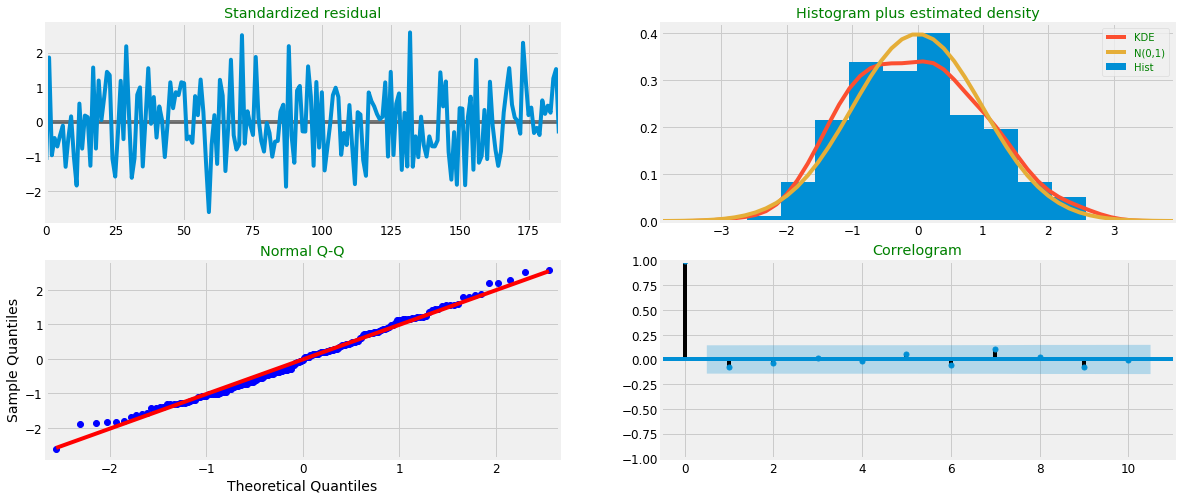

In [12]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

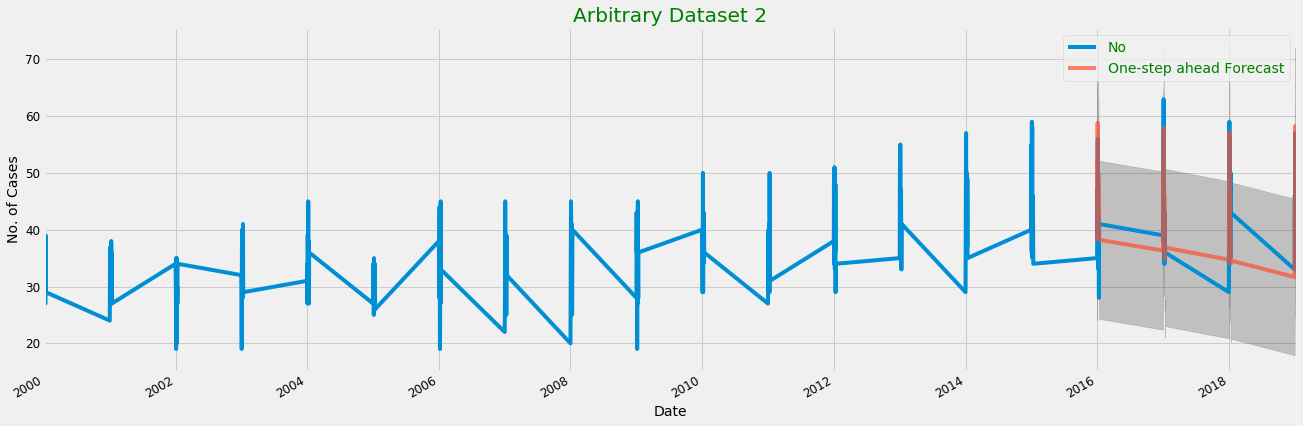

In [70]:
rcParams['figure.figsize']=20,7

pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('No. of Cases')
plt.legend()
plt.title('Arbitrary Dataset 2')
plt.savefig('monthly2_modelfit.png')
plt.show()


In [14]:
y_forecasted = pred.predicted_mean
y_forecasted=y_forecasted.to_frame()
y_truth = df['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 0    NaN
No   NaN
dtype: float64
The Root Mean Squared Error is 0    NaN
No   NaN
dtype: float64


In [15]:
y_forecasted = pred.predicted_mean
y_forecasted.head(100)

Date
2016-01-01    38.033988
2016-01-02    52.054362
2016-01-03    44.081776
2016-01-04    58.825240
2016-01-05    45.864716
2016-01-06    44.860103
2016-01-07    41.738484
2016-01-08    49.220525
2016-01-09    44.906589
2016-01-10    44.146920
2016-01-11    40.948663
2016-01-12    38.221146
2017-01-01    36.313407
2017-01-02    50.962405
2017-01-03    42.075258
2017-01-04    57.908730
2017-01-05    47.810018
2017-01-06    44.373086
2017-01-07    42.382516
2017-01-08    45.979709
2017-01-09    39.603914
2017-01-10    41.635544
2017-01-11    34.843265
2017-01-12    36.855565
2018-01-01    34.707954
2018-01-02    45.972240
2018-01-03    40.015935
2018-01-04    57.126042
2018-01-05    42.445792
2018-01-06    45.123712
2018-01-07    37.531940
2018-01-08    42.146764
2018-01-09    37.841296
2018-01-10    37.433965
2018-01-11    33.980411
2018-01-12    34.568440
2019-01-01    31.670693
2019-01-02    43.145966
2019-01-03    38.290279
2019-01-04    58.257109
2019-01-05    43.696094
2019-01-06 

In [65]:
pred_uc = results.get_forecast(steps=12) #for (next 12 months) 1 year prediction
pred_ci = pred_uc.conf_int()


## Prediction for next year (dataset was upto 2019, so predicting number of cases for 2020)

In [66]:
forecast = pred_uc.predicted_mean
forecast=forecast.to_frame()

forecast=forecast.rename(columns = {0:'No of Cases'})
forecast.head()

,No of Cases
240,31.404320
241,43.798532
242,37.659327
243,58.918396
244,43.249189


In [67]:
forecast=forecast['No of Cases'].apply(np.ceil) #ceiling function applied to float data
forecast=forecast.to_frame()


In [68]:
forecast.head(12)

,No of Cases
240,32.0
241,44.0
242,38.0
243,59.0
244,44.0
245,50.0
246,38.0
247,43.0
248,38.0
249,38.0


In [69]:
forecast.to_csv("2020 Predictions for Dataset 2.csv")